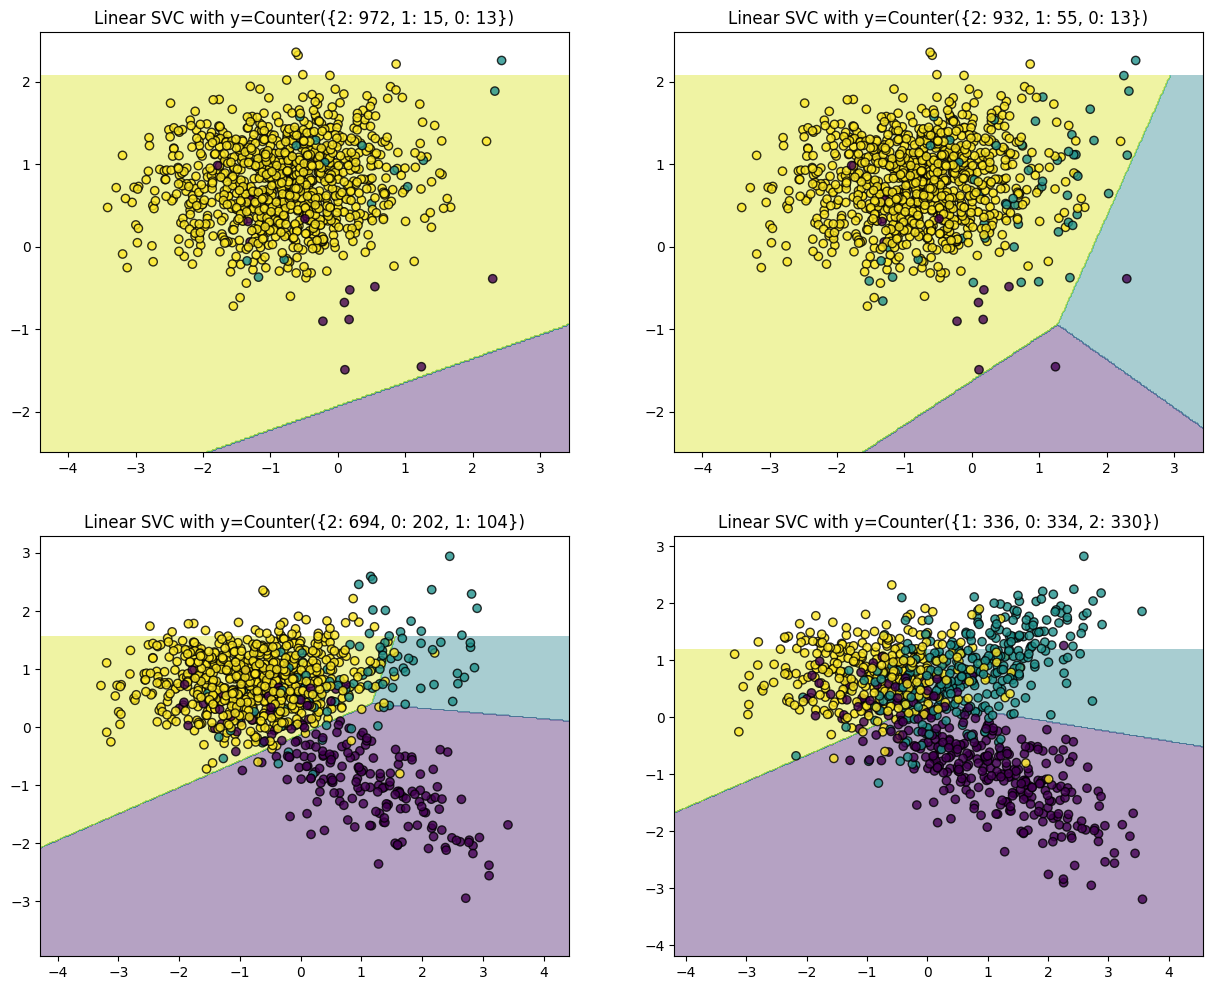

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

def create_dataset(n_samples=1000,weights=(0.01,0.01,0.98),n_classes=3,
                   class_sep=0.8,n_clusters=1):
  return make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,
                             n_classes=n_classes,n_clusters_per_class=n_clusters,
                             weights=list(weights),class_sep=class_sep,random_state=0)

def plot_decision_function(X,y,clf,ax):
    plot_step = 0.02
    x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1,X[:1].max()+1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    ax.contourf(xx,yy,z,alpha=0.4)
    ax.scatter(X[:,0],X[:,1],alpha=0.8,c=y,edgecolor='k')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15,12))

ax_arr=(ax1,ax2,ax3,ax4)
weights_arr = ((0.01,0.01,0.98),(0.01,0.05,0.94),
               (0.2,0.1,0.7),(0.33,0.33,0.33))
for ax,weights in zip(ax_arr,weights_arr):
  X, y = create_dataset(n_samples=1000, weights=weights)
  clf=LinearSVC().fit(X,y)
  plot_decision_function(X,y,clf,ax)
  ax.set_title('Linear SVC with y={}'.format(Counter(y)))

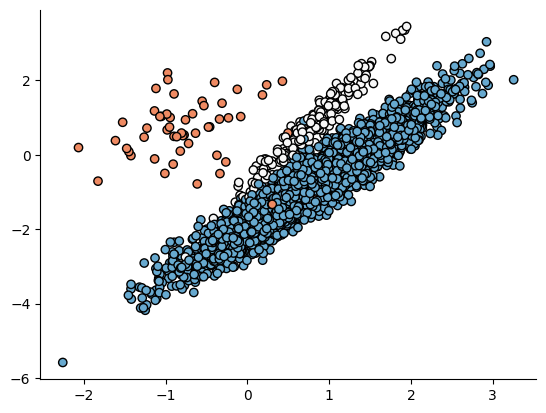

In [26]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,n_redundant=0,n_repeated=0,n_classes=3,
                           n_clusters_per_class=1,weights=[0.01,0.05,0.94],class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v==0 else '#f7f7f7' if v==1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0],X[:,1], c= colors, **kwarg_params)
sns.despine()

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

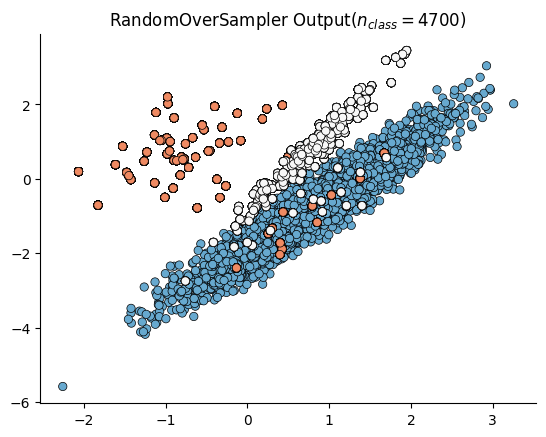

In [28]:
ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ["#ef8a62" if v==0 else "#f7f7f7" if v==1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:,0], X_resampled[:,1] ,c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output($n_{class}=4700)$")
pass

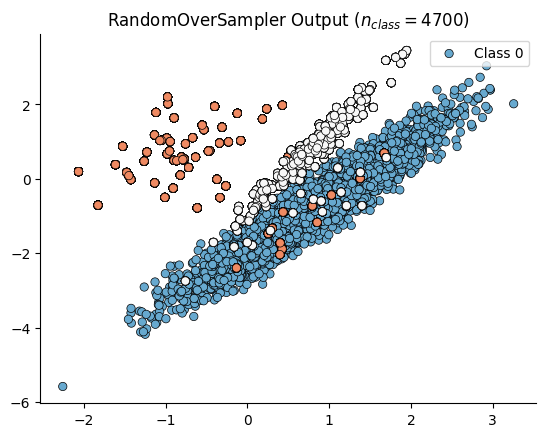

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined ros, X, and y
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Define colors
colors = ["#ef8a62" if v == 0 else "#f7f7f7" if v == 1 else '#67a9cf' for v in y_resampled]

# Scatter plot
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')

# Remove the top and right spines from plot
sns.despine()

# Set title
plt.title("RandomOverSampler Output ($n_{class}=4700)$")

# Add legend
plt.legend(labels=['Class 0', 'Class 1', 'Class 2'])

# Show plot
plt.show()


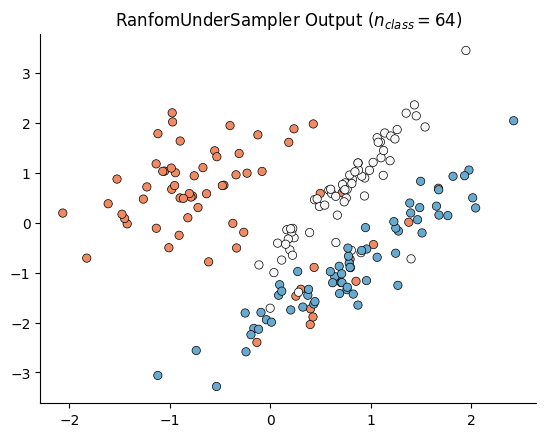

In [30]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_resample(X,y)
colors = ['#ef8a62' if v==0 else '#f7f7f7' if v==1 else "#67a9cf" for v in y_resampled]
plt.scatter(X_resampled[:, 0],X_resampled[:, 1], c=colors, linewidths=0.5, edgecolors='black')
sns.despine()
plt.title("RanfomUnderSampler Output ($n_{class}=64)$")
pass

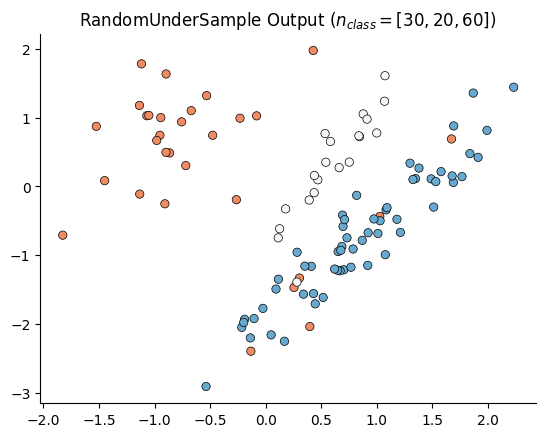

In [31]:
rus = RandomUnderSampler(random_state=0, sampling_strategy={0: 30, 1: 20, 2: 60})
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_resample(X,y)
colors = ['#ef8a62' if v==0 else '#f7f7f7' if v==1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSample Output ($n_{class}=[30, 20, 60 ])$")
pass

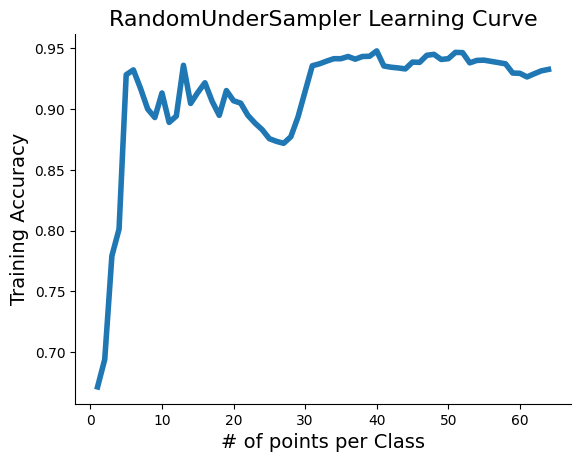

In [32]:
def learning_curve(X, y, observations=range(1, 65)):
  scores = []
  for n in observations:
    rus = RandomUnderSampler(random_state=0, sampling_strategy={0: n, 1:n,2:n})
    rus.fit(X,y)
    X_resampled, y_resampled =rus.fit_resample(X,y)
    score = LinearSVC().fit(X_resampled, y_resampled).score(X,y)
    scores.append(score)
  return scores

plt.plot(range(1,65), learning_curve(X,y), linewidth=4)
plt.title("RandomUnderSampler Learning Curve", fontsize=16)
plt.gca().set_xlabel('# of points per Class', fontsize=14)
plt.gca().set_ylabel("Training Accuracy", fontsize=14)
sns.despine()
pass

In [ ]:

#from imblearn.ensemble import EasyEnsemble
#e = EasyEnsemble(random_state=0, n_subsets=10)
#e.fit(X, y)
#X_resampled, y_resampled = e.sample(X, y)
#colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled[0, :]]
#plt.scatter(X_resampled[0, :, 0], X_resampled[0, :, 1], c=colors, linewidth=1, edgecolor='black')
#sns.despine()

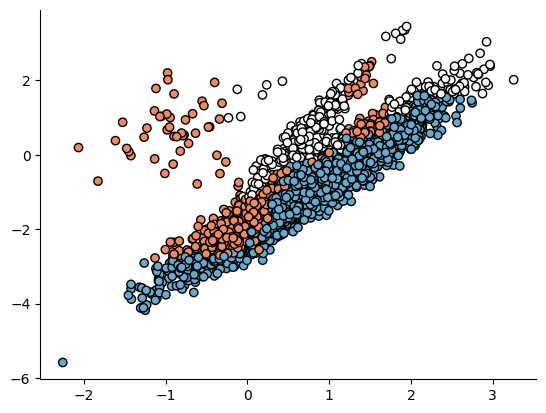

In [35]:
from imblearn.ensemble import EasyEnsembleClassifier

e = EasyEnsembleClassifier(random_state=0, n_estimators=10)
e.fit(X, y)

# Use predict to generate resampled labels
y_resampled = e.predict(X)

# Since the EasyEnsembleClassifier doesn't change the feature set, X_resampled remains the same as X
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X[:, 0], X[:, 1], c=colors, linewidths=1, edgecolors='black')
sns.despine()


In [36]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

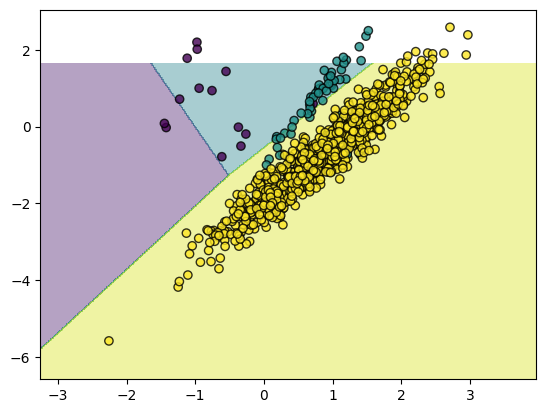

In [38]:
ax = plt.gca()
plot_decision_function(X[:,:2][:1000],y[:1000],LinearSVC().fit(X[:,:2][:5000],y[:5000]), ax)

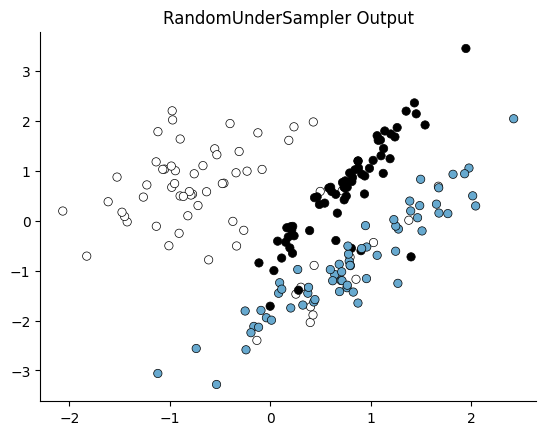

In [42]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_resample(X,y)
colors = ['white' if v==0 else 'black' if v==1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:,0],X_resampled[:,1], c=colors,linewidths=0.5,edgecolors='black')
sns.despine()
plt.title("RandomUnderSampler Output")
pass

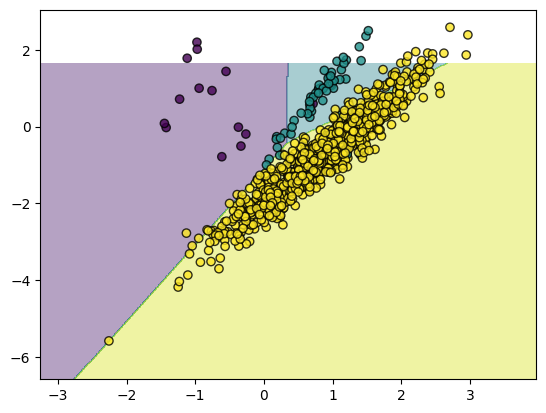

In [43]:
ax = plt.gca()
plot_decision_function(X[:, :2][:1000], y[:1000], LinearSVC().fit(X_resampled[:, :2], y_resampled), ax)

In [44]:
def costed_error(y, y_hat):
    sum_error = 0
    for _y, _y_hat in zip(y, y_hat):
        if _y != _y_hat:
            n = 1 if _y == 0 else 50
            sum_error += n
    return sum_error

In [45]:
clf_pre = LinearSVC().fit(X[:1000], y[:1000])
clf_post = LinearSVC().fit(X_resampled, y_resampled)

In [46]:
costed_error(y, clf_pre.predict(X))

4614

In [47]:
costed_error(y, clf_post.predict(X))

20015